## Data Visualization

Visualization plays an important role in time series analysis and forecasting. Plots of the raw sample data
can provide valuable diagnostics to identify temporal structures like trends, cycles and seasonality that
can influence the choice of the model.  

Many novices in the field of time series forecasting stop with line plots. We will take a look at 6 different types
of visualization  
     
     1. Line Plots  
     2. Histograms and Density Plots  
     3. Box and Whisker Plots  
     4. Heat Maps  
     5. Lag Plots or Scatter Plots  
     6 Autocorrelation Plots  
     

#### Minimum Daily Temperatures Dataset


In [1]:
from pandas import read_csv
import os
import pandas as pd
from matplotlib import pyplot


In [2]:
data = os.environ.get('data') # avoid personal information in the notebook
data_path = data + '\TimeSeries\\3-daily-minimum-temperatures.csv'

series = read_csv(data_path,header=0, index_col=0, parse_dates=True, squeeze=True)
series.head(n=6)

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
1981-01-06    15.8
Name: Temp, dtype: float64

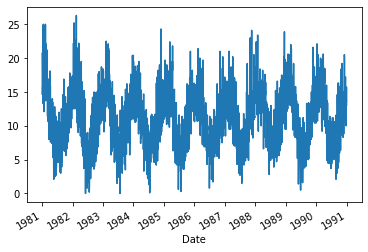

In [3]:
series.plot()
pyplot.show()

The line plot is quite dense. Sometimes it can help to change the style of the line plot; for example to use a dashed line, we change the line stile to improve readability. We set the Figure seize to one more apropiate too.

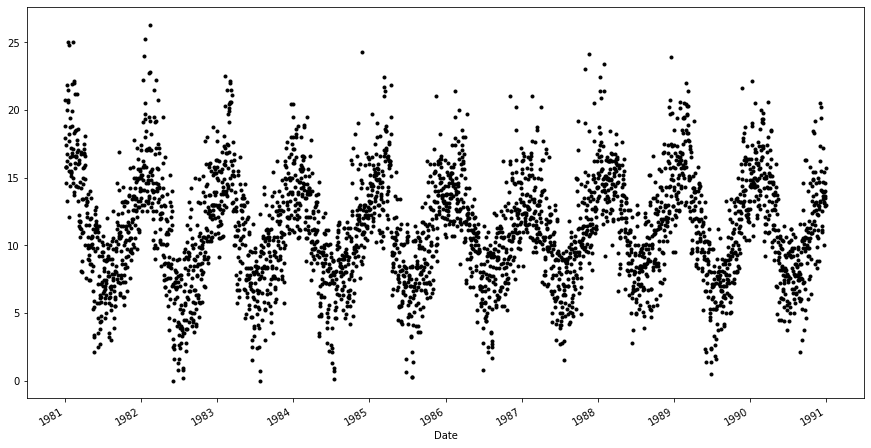

In [4]:
pyplot.rcParams['figure.figsize'] = [15, 8]
series.plot(style='k.')
pyplot.show()

Could be interesting compare Month with Month - Day with Day - Year with year

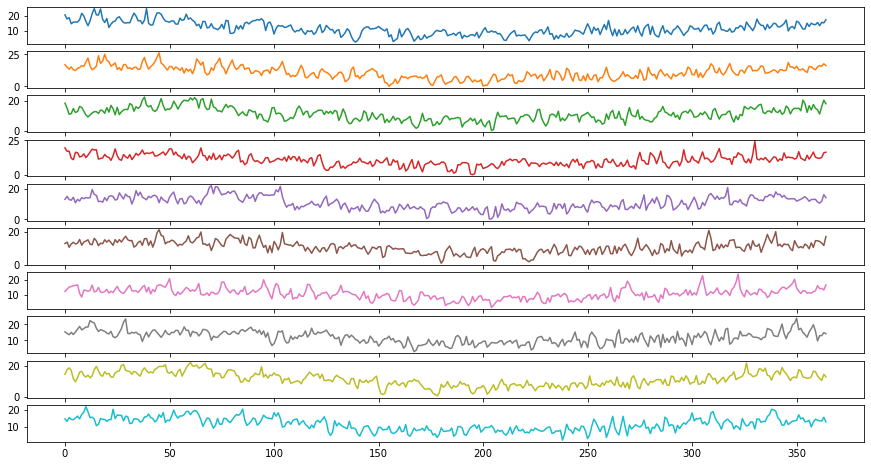

In [5]:
#from pandas import Grouper
groups = series.groupby(pd.Grouper(freq='A'))
years = pd.DataFrame()
for name, group in groups:
    years[name.year] = group.values
years.plot(subplots=True, legend=False)
pyplot.show()

**Histogram**  
Another important visualization is of the distribution of observations themselves. This means a plot of the values without the temporal ordering

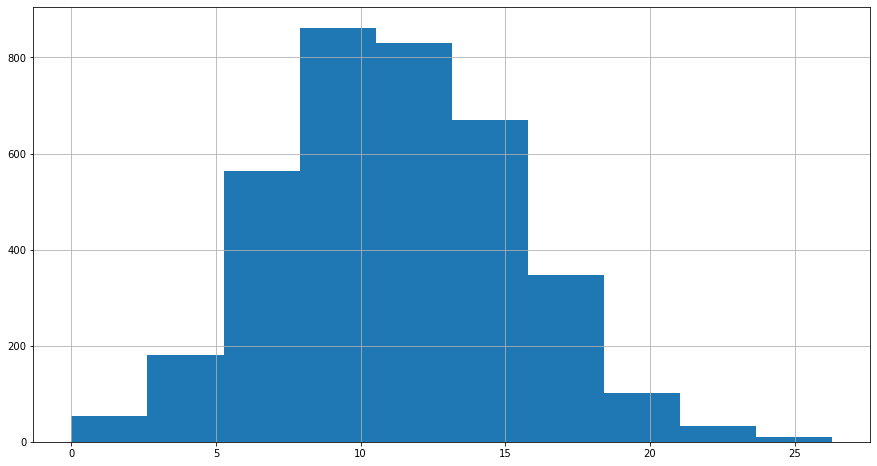

In [6]:
series.hist()
pyplot.show()


We can get a better idea of the shape of the distribution of observations by density plot.

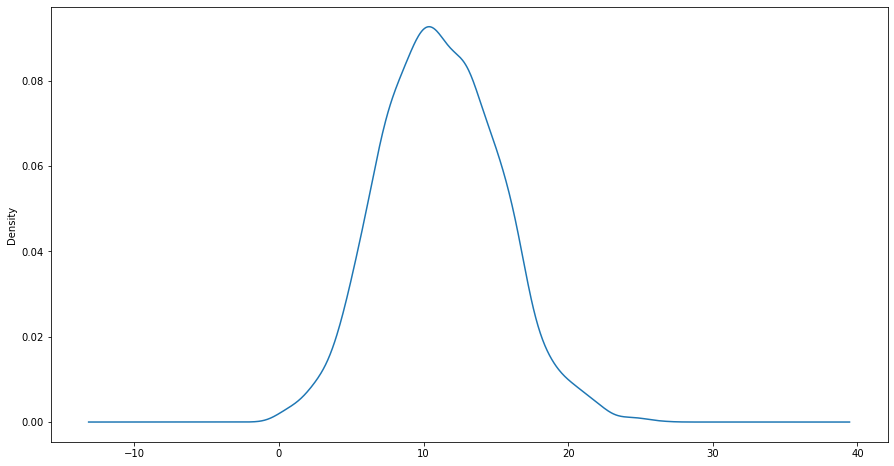

In [8]:
series.plot(kind='kde')
pyplot.show()

#### Box and Whisker Plots by Interval  

Histograms and density plots provide insight into the distribution of all observation, but we may be interesting in
this plot draws a box around the 25th and 75th percentiles of the data that captures the 50% of observations.


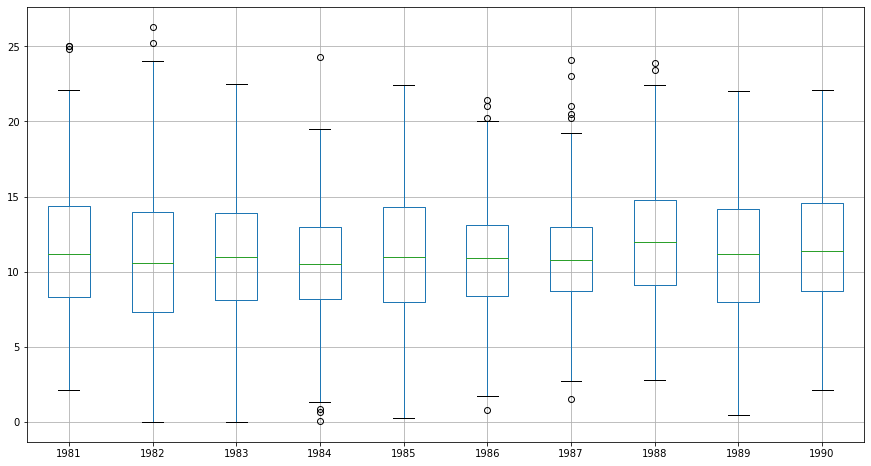

In [10]:
groups = series.groupby(pd.Grouper(freq='A'))
years = pd.DataFrame()
for name, group in groups:
    years[name.year] = group.values
years.boxplot()
pyplot.show()


how to read a Box Plot ?
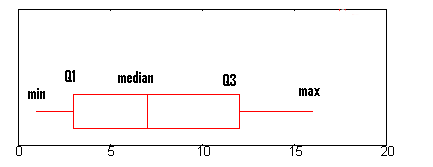

You may be intersted in the distribution of values across months within a year

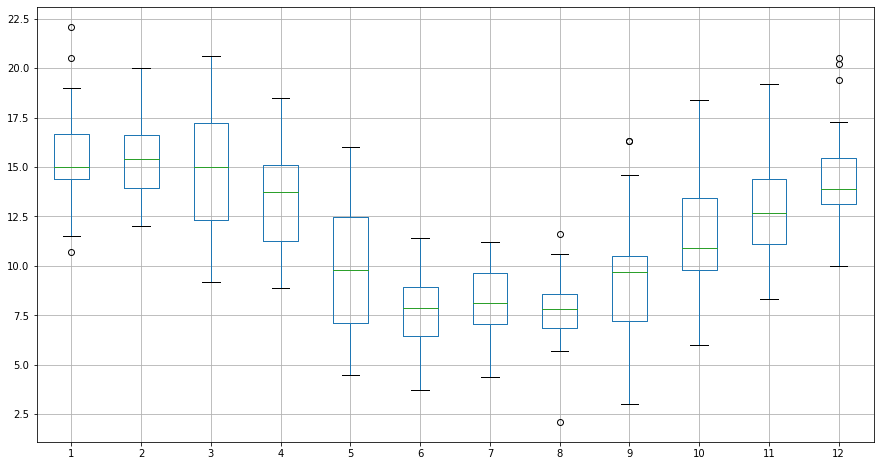

In [11]:
one_year = series['1990']
groups = one_year.groupby(pd.Grouper(freq='M'))
months = pd.concat([pd.DataFrame(x[1].values) for x in groups], axis=1)
months = pd.DataFrame(months)
months.columns = range(1,13)
months.boxplot()
pyplot.show()

### Heat Maps  

larger values can be draw with warmer colos(yellows and red) smaller values with cooler colors (blues and greens)

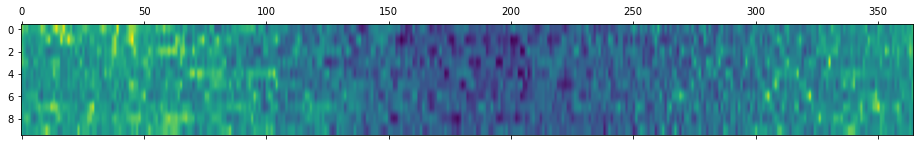

In [14]:
groups = series.groupby(pd.Grouper(freq='A'))
years = pd.DataFrame()
for name, group in groups:
    years[name.year] = group.values
years = years.T
pyplot.matshow(years, interpolation=None, aspect='auto')
pyplot.show()

## I dont really like that map... 

### Lag Scatter Plots

Time series modeling assumes a relationship between an observarion and the previous observation.  
Previous observation in a time series are called lags. Previous time steop is called lag1, the observation at two time steps ago are called lag=2.


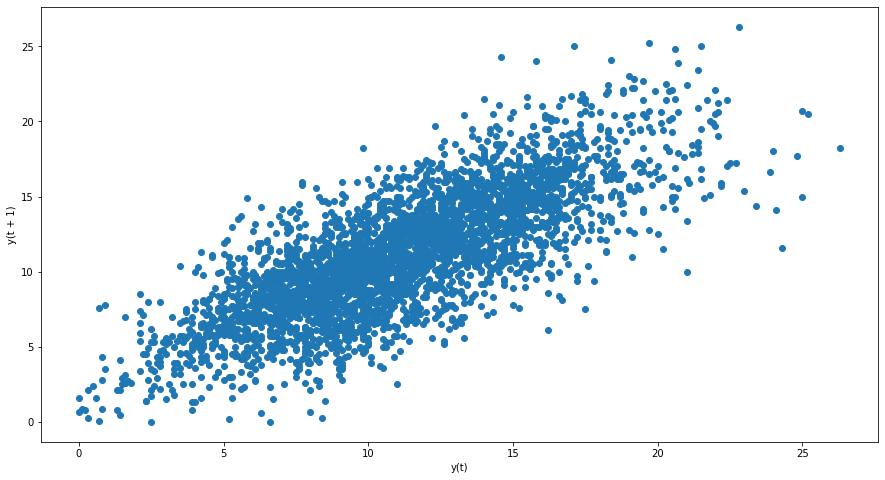

In [15]:
from pandas.plotting import lag_plot

lag_plot(series)
pyplot.show()

We can repeat this process for an observation and any lag values. Perhaps with the observation at the same time last week, last month or last year.

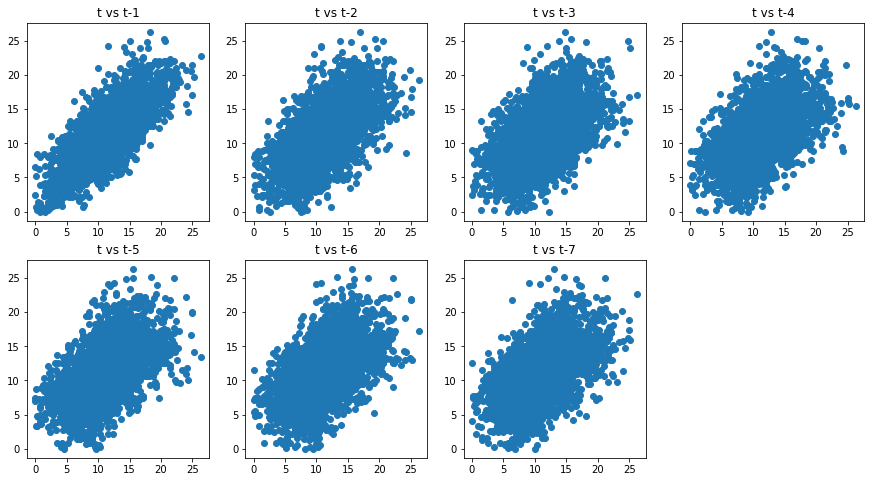

In [17]:
values = pd.DataFrame(series.values)
lags = 7
columns = [values]
for i in range(1,(lags + 1)):
    columns.append(values.shift(i))
dataframe = pd.concat(columns, axis=1)
columns = ['t']
for i in range(1,(lags + 1)):
    columns.append('t-' + str(i))
dataframe.columns = columns
pyplot.figure(1)
for i in range(1,(lags + 1)):
    ax = pyplot.subplot(240 + i)
    ax.set_title('t vs t-' + str(i))
    pyplot.scatter(x=dataframe['t'].values, y=dataframe['t-'+str(i)].values)
pyplot.show()

#### Autocorrelation Plots.

Correlation between his own lag its calle autocorrelation

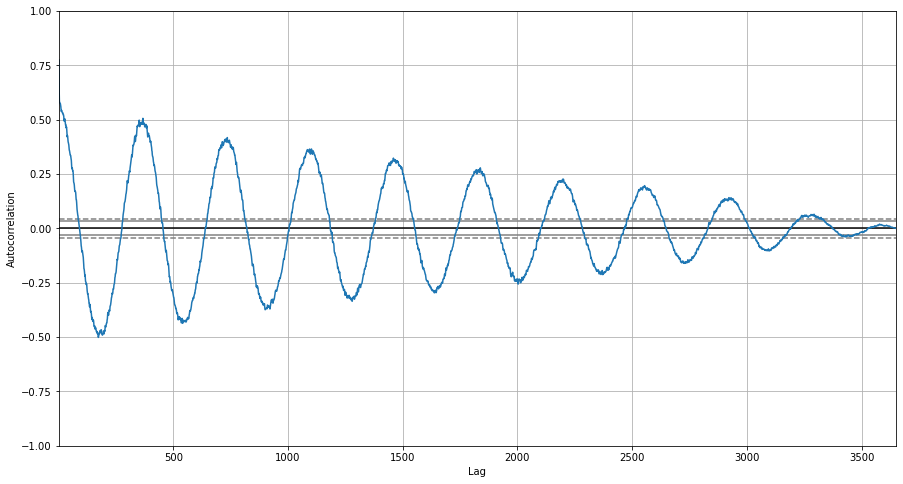

In [20]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(series)
pyplot.show()